In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the data set
iris = pd.read_csv('Iris.csv',index_col=0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris['Species'] = LabelEncoder().fit_transform(iris['Species'])

In [4]:
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2
149,6.2,3.4,5.4,2.3,2
150,5.9,3.0,5.1,1.8,2


                   MEASURING MODEL PERFORMANCE

In [5]:
X = iris.iloc[:,[0,1,2,3]].values
y = iris.iloc[:,4].values

X = X.reshape(-1, 4)
X_scaled = preprocessing.scale(X) # scale the data 
X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.25, random_state=0)

                  FITTING THE MODEL TO LOGISTIC MODEL

In [6]:
# fit a model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [7]:
# make predictions on test data
y_pred = log_reg.predict(X_test).reshape(-1,1)

In [8]:
# use score method to get accuracy of model
score = log_reg.score(X_test, y_test)

print('Accuracy: {}'.format(score))

Accuracy: 0.9736842105263158


                       MEASURING PERFORMANCE USING CONFUSION MATRIX

Accuracy Score: 0.9736842105263158
Confusion Matrix: 
 [[13  0  0]
 [ 0 15  0]
 [ 0  1  9]]
Classification Report: 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        15
           2       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



<Figure size 5000x1500 with 0 Axes>

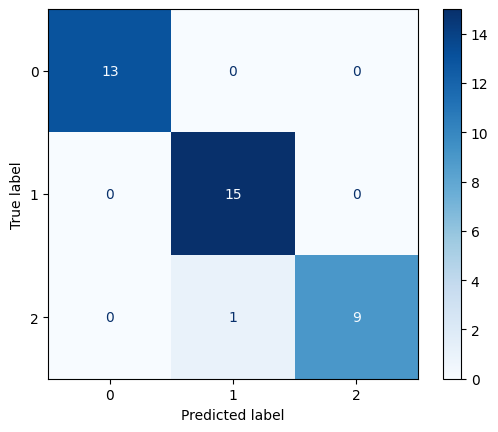

In [9]:
#Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report     , ConfusionMatrixDisplay

print("Accuracy Score:",accuracy_score(y_pred, y_test))
print("Confusion Matrix: \n",confusion_matrix(y_pred, y_test))
print("Classification Report: \n " ,classification_report(y_pred, y_test))
cm = confusion_matrix(y_pred, y_test,labels=log_reg.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
plt.figure(figsize=(50, 15))
disp.plot(cmap='Blues')

unlike when the target varible is two variables(of Iris-satosa and not Iris-satosa),here we get different confussion matrix where precision and recall are not same.Our model did not predicts the species 100%.

In [10]:
from sklearn.metrics import f1_score, precision_score, recall_score

# average f1 score
av_f1 = f1_score(y_test, y_pred, average='micro')
print(av_f1)

# f1 score per class
iris = load_iris()
classes = list(iris.target_names)
f = f1_score(y_test, y_pred, average=None)
lowest_score = min(f)
hardest_class = classes[list(f).index(lowest_score)]
print('Hardest class:', hardest_class)

0.9736842105263158
Hardest class: virginica


The model finds harder to differenciate viginica from Verci color because it predicts species to be Versi-color when it was Virginica. We can even notice that precision is high than recall in Viginica.